In [179]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *

IMPORTANT: these scripts/functions assume you have the following files in the data/raw directory:
- From the CMU dataset: 
    - movie.metadata.tsv
    - plot_summaries.txt
- From the TMDB dataset: 
    - TMDB_movie_dataset_v11.csv

AND have data/processed folder created

Note: download CMU dataset here: https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
and TMDB dataset here (Download button): https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [180]:
# from raw files, creates clean datafiles
%run src/data/clean_data.py

original df shape (1128267, 24)
after status (1102948, 24)
after adult (998193, 24)
after release date (669854, 24)
after release year (669854, 25)
after runtime (669388, 25)
after duplicates (656196, 25)
after numeric columns (656195, 25)
after select columns (656195, 13)
original df shape (81740, 9)
after release year (44006, 9)
after runtime (36612, 9)
after duplicates (36548, 9)
after numeric columns (36548, 9)
after select columns (36548, 5)


In [181]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')

In [182]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374765 entries, 0 to 656194
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   release_year          374765 non-null  int64 
 1   summary               317734 non-null  object
 2   release_date          374765 non-null  object
 3   budget                374765 non-null  int64 
 4   original_language     374765 non-null  object
 5   overview              317734 non-null  object
 6   genres                374765 non-null  object
 7   production_companies  374765 non-null  object
 8   production_countries  374765 non-null  object
 9   spoken_languages      374765 non-null  object
 10  keywords              374765 non-null  object
 11  title                 374762 non-null  object
 12  runtime               374765 non-null  int64 
 13  revenue               374765 non-null  int64 
 14  dvd_era               374765 non-null  object
dtypes: int64(4), object(11

In [183]:
df_combined.head()

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,runtime,revenue,dvd_era
0,1987,A series of murders of rich young women throug...,1987-06-19,0,en,"In a wealthy and isolated desert community, a ...","[Horror, Thriller]",[Mrs. White's Productions],[United Kingdom],[English],"[based on novel or book, gas station, psychopa...",White Of The EyeWhite of the Eye,221,0,pre
1,1983,"Eva, an upper class housewife, becomes frustra...",1983-05-11,0,de,"Eva, an upper-class housewife, frustratedly le...",[Drama],[Dieter Geissler Filmproduktion],[Germany],[German],"[jealousy, eroticism, gigolo, longing, dominat...",A Woman in FlamesA Woman in Flames,212,0,pre
2,2002,"Every hundred years, the evil Morgana returns...",2002-04-12,0,en,"Every hundred years, the evil sorceress Morgan...","[Adventure, Family, Fantasy]","[Peakviewing Productions, Peakviewing Transatl...",[United Kingdom],"[French, English]",[morgana],The Sorcerer's ApprenticeThe Sorcerer's Appren...,172,0,during
3,1997,"Adam, a San Francisco-based artist who works a...",1997-04-04,0,en,Best friends Adam and Kevin have a lot in comm...,"[Comedy, Romance]","[Bandeira Entertainment, Miramax]",[],[English],[],Little cityLittle City,183,0,pre
4,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,Gritty adaption of William Shakespeare's play ...,"[War, Drama, History]","[BBC Film, Renaissance Films, Samuel Goldwyn C...",[United Kingdom],[English],"[france, kingdom, theater play, based on true ...",Henry VHenry V,274,20337800,pre


count    94064.000000
mean         3.099836
std         14.576700
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1929.000000
Name: count, dtype: float64


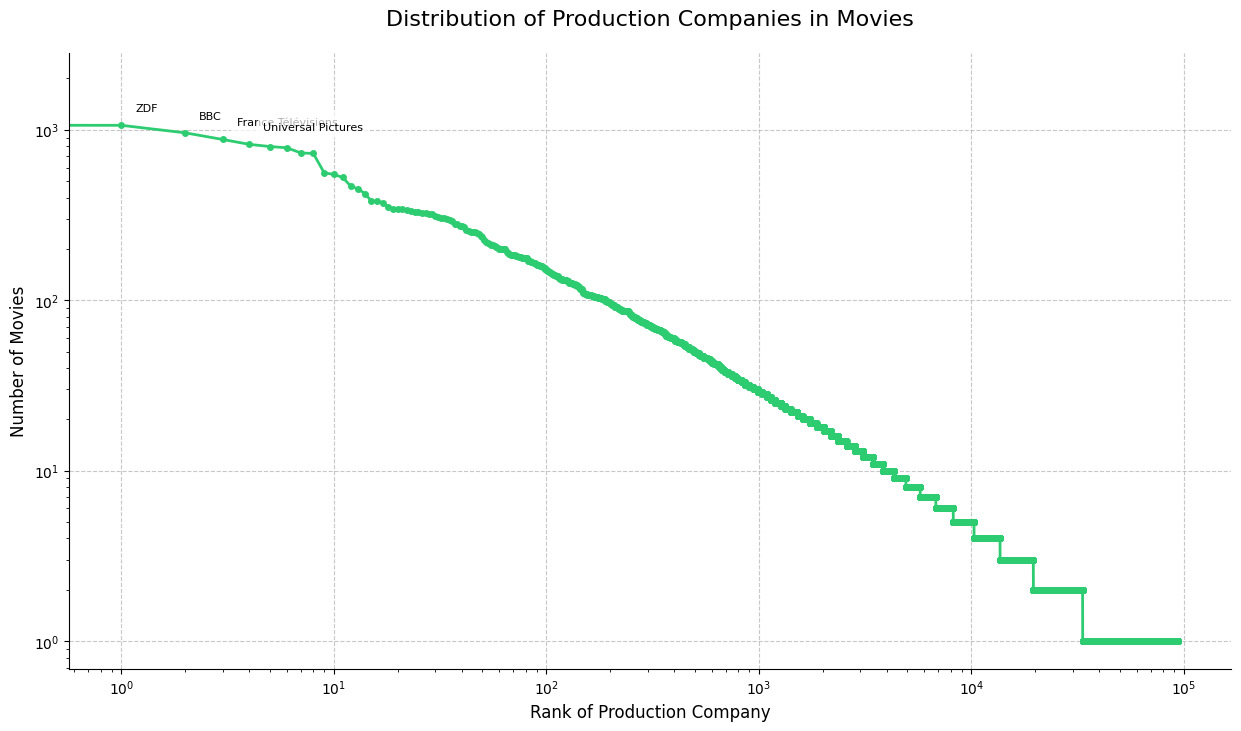

In [184]:
companies = df_combined['production_companies'].explode().value_counts()
plt.figure(figsize=(15, 8))

plt.plot(range(len(companies)), 
         companies.values, 
         linewidth=2, 
         marker='o',
         markersize=4,
         color='#2ecc71')
plt.yscale('log')
plt.xscale('log')

    
plt.title('Distribution of Production Companies in Movies', 
          fontsize=16, 
          pad=20)
plt.xlabel('Rank of Production Company', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

for i in range(5):  # Annotate top 5
    plt.annotate(f'{companies.index[i]}',
                xy=(i, companies.values[i]),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=8,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
print(df_combined['production_companies'].explode().value_counts().describe())


/var/folders/3q/hzh268rx169fgmsptrb9rzzm0000gn/T/ipykernel_2284/1042983089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


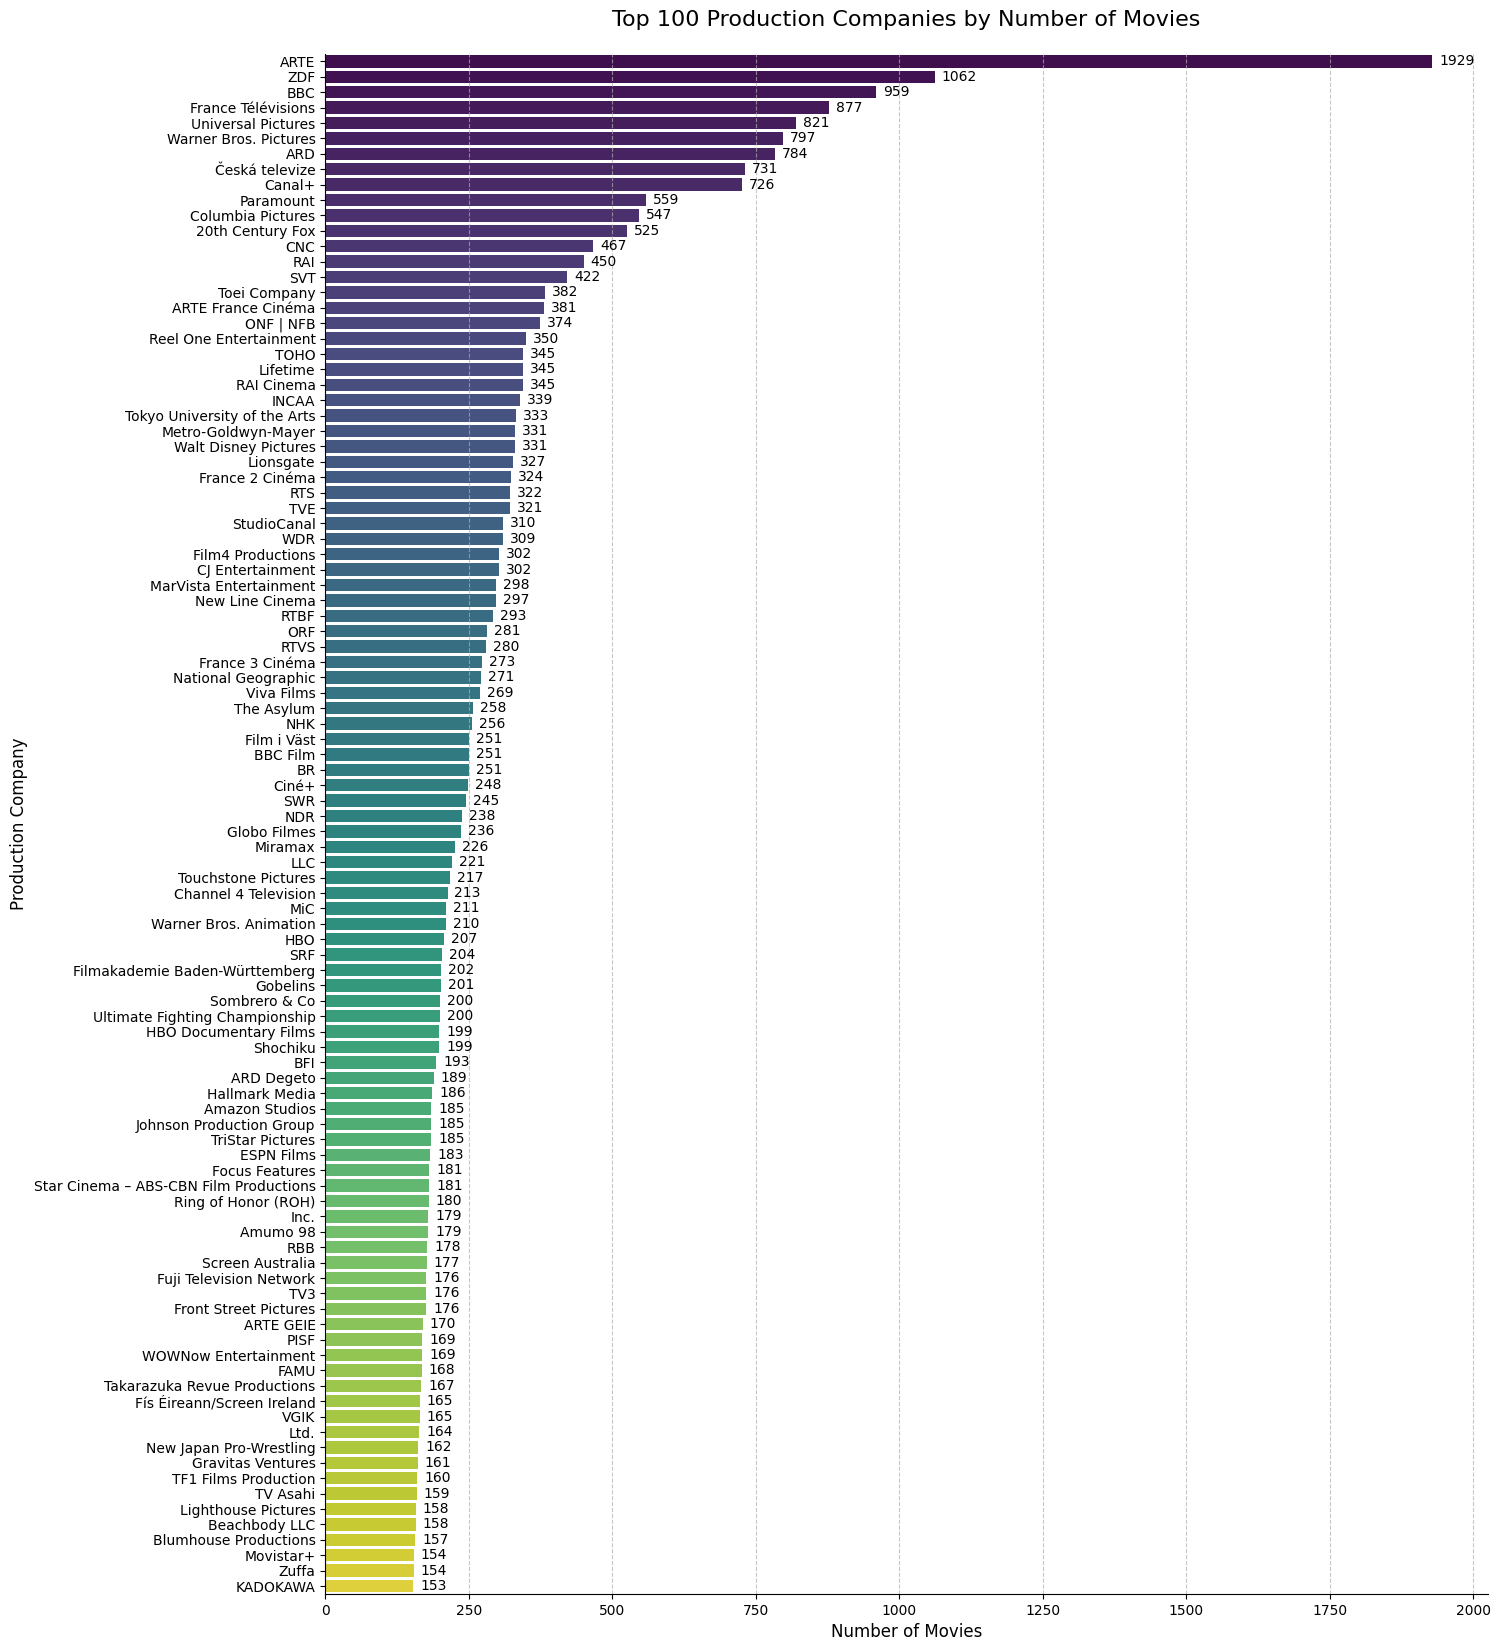

In [185]:
top_100_companies = df_combined['production_companies'].explode().value_counts().head(100)


plt.figure(figsize=(15, 20))

ax = sns.barplot(
    y=top_100_companies.index,
    x=top_100_companies.values,
    palette='viridis'  
)

plt.title('Top 100 Production Companies by Number of Movies', 
          fontsize=16, 
          pad=20)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Production Company', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=5)
ax.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()



Top 20 Production Companies by Total Revenue:
                                    sum  count  revenue_millions
production_companies                                            
Warner Bros. Pictures      121816754332    797     121816.754332
Universal Pictures         115145183400    821     115145.183400
20th Century Fox            98610653224    525      98610.653224
Paramount                   98449807600    559      98449.807600
Columbia Pictures           90696528621    547      90696.528621
Walt Disney Pictures        76918670628    331      76918.670628
New Line Cinema             40004199321    297      40004.199321
Marvel Studios              37691648309     74      37691.648309
DreamWorks Pictures         36689056992    139      36689.056992
Amblin Entertainment        32234771932     95      32234.771932
Metro-Goldwyn-Mayer         28772526338    331      28772.526338
Touchstone Pictures         27950549041    217      27950.549041
Relativity Media            27558355727    1

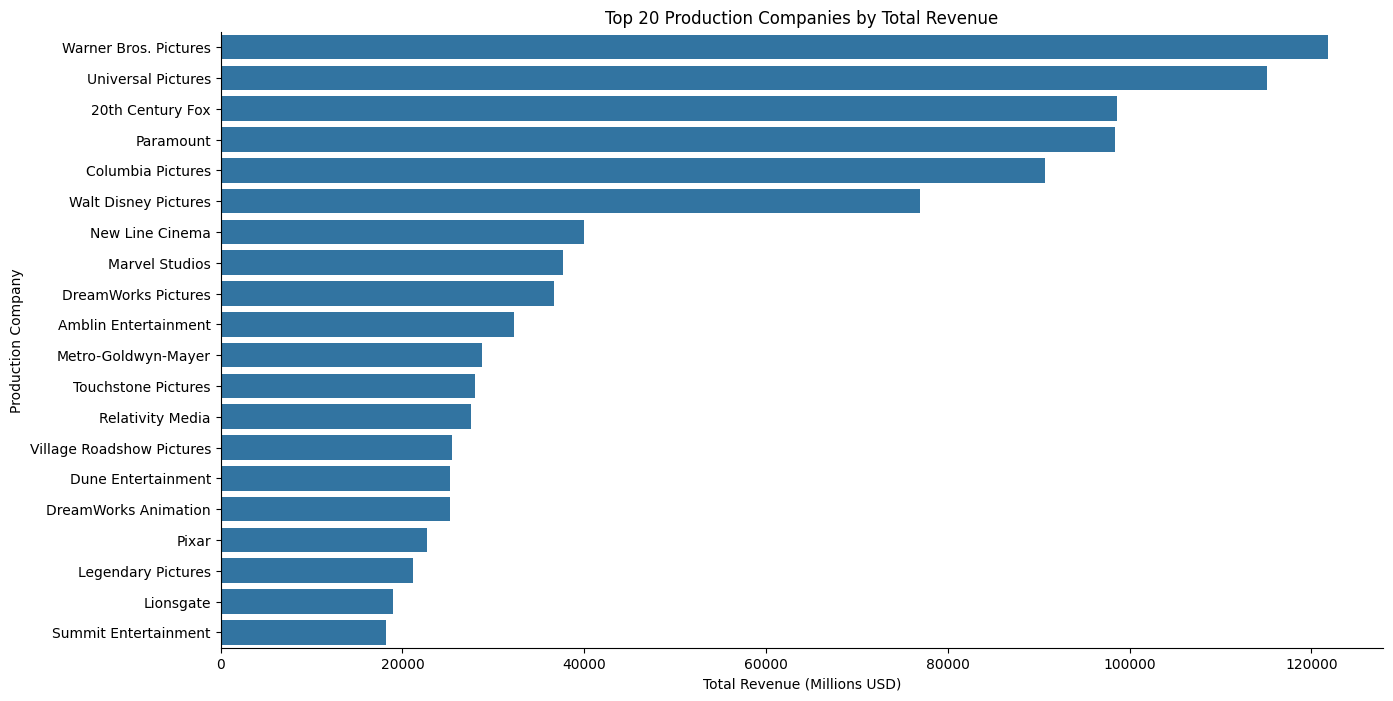

In [186]:
company_revenue = (df_combined.explode('production_companies')
                  .groupby('production_companies')['revenue']
                  .agg(['sum', 'count'])
                  .sort_values('sum', ascending=False))

company_revenue['revenue_millions'] = company_revenue['sum'] / 1_000_000

# Show top 20 companies by revenue
print("Top 20 Production Companies by Total Revenue:")
print(company_revenue.head(20))

plt.figure(figsize=(15, 8))
sns.barplot(data=company_revenue.head(20).reset_index(), 
            x='revenue_millions', 
            y='production_companies')
plt.title('Top 20 Production Companies by Total Revenue')
plt.xlabel('Total Revenue (Millions USD)')
plt.ylabel('Production Company')
sns.despine()

Top 20 Production Companies by Total Revenue:
                                               sum  count  revenue_millions
production_companies     release_year                                      
20th Century Fox         2009          10265084170     10      10265.084170
Universal Pictures       2012           8269968651     38       8269.968651
Columbia Pictures        2012           8149747752     20       8149.747752
Dune Entertainment       2009           8036539887      9       8036.539887
Warner Bros. Pictures    2012           7469316913     36       7469.316913
Walt Disney Pictures     2010           7385869791      8       7385.869791
Warner Bros. Pictures    2009           6887181960     18       6887.181960
20th Century Fox         2006           6627269746     21       6627.269746
Paramount                2010           6398570205     14       6398.570205
Warner Bros. Pictures    2004           6117135332     18       6117.135332
Walt Disney Pictures     2019           60

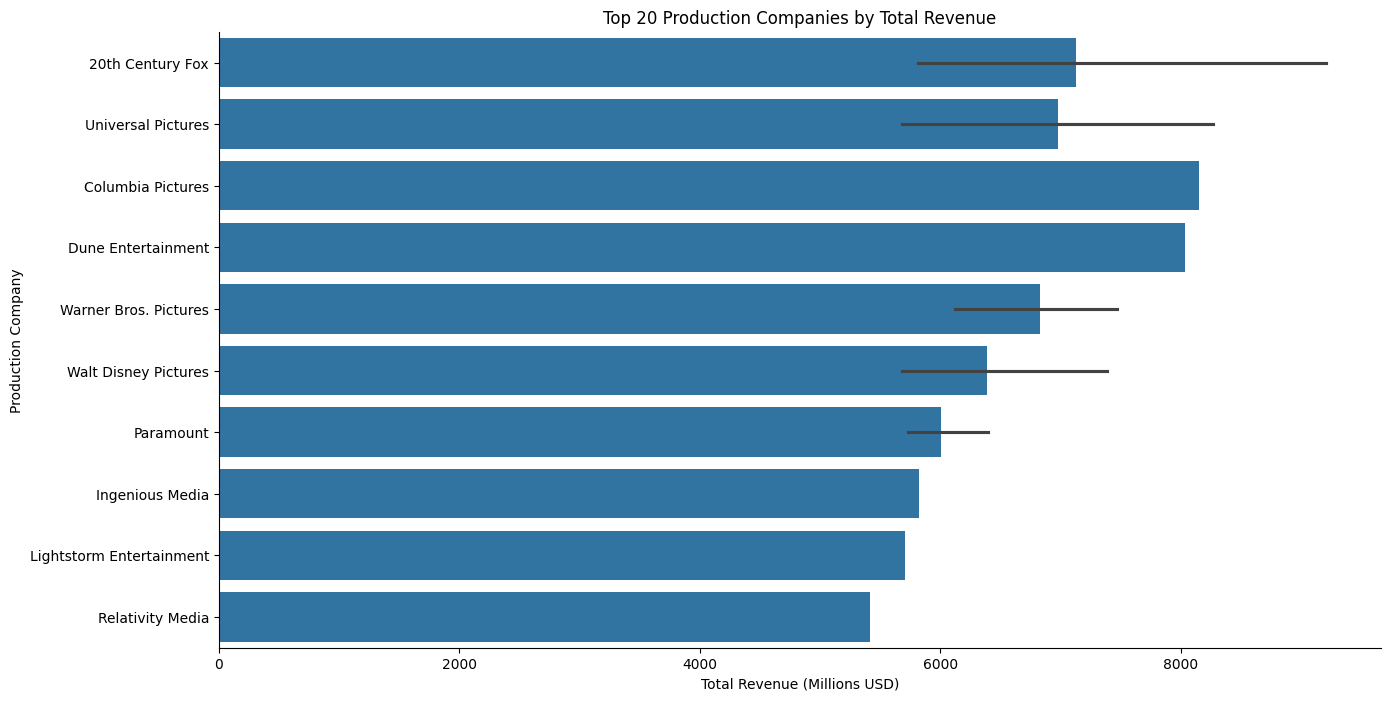

In [187]:
company_revenue = (df_combined.explode('production_companies')
                  .groupby(['production_companies', 'release_year'])['revenue']
                  .agg(['sum', 'count'])
                  .sort_values('sum', ascending=False))

company_revenue['revenue_millions'] = company_revenue['sum'] / 1_000_000

# Show top 20 companies by revenue
print("Top 20 Production Companies by Total Revenue:")
print(company_revenue.head(20))

plt.figure(figsize=(15, 8))
sns.barplot(data=company_revenue.head(20).reset_index(), 
            x='revenue_millions', 
            y='production_companies')
plt.title('Top 20 Production Companies by Total Revenue')
plt.xlabel('Total Revenue (Millions USD)')
plt.ylabel('Production Company')
sns.despine()

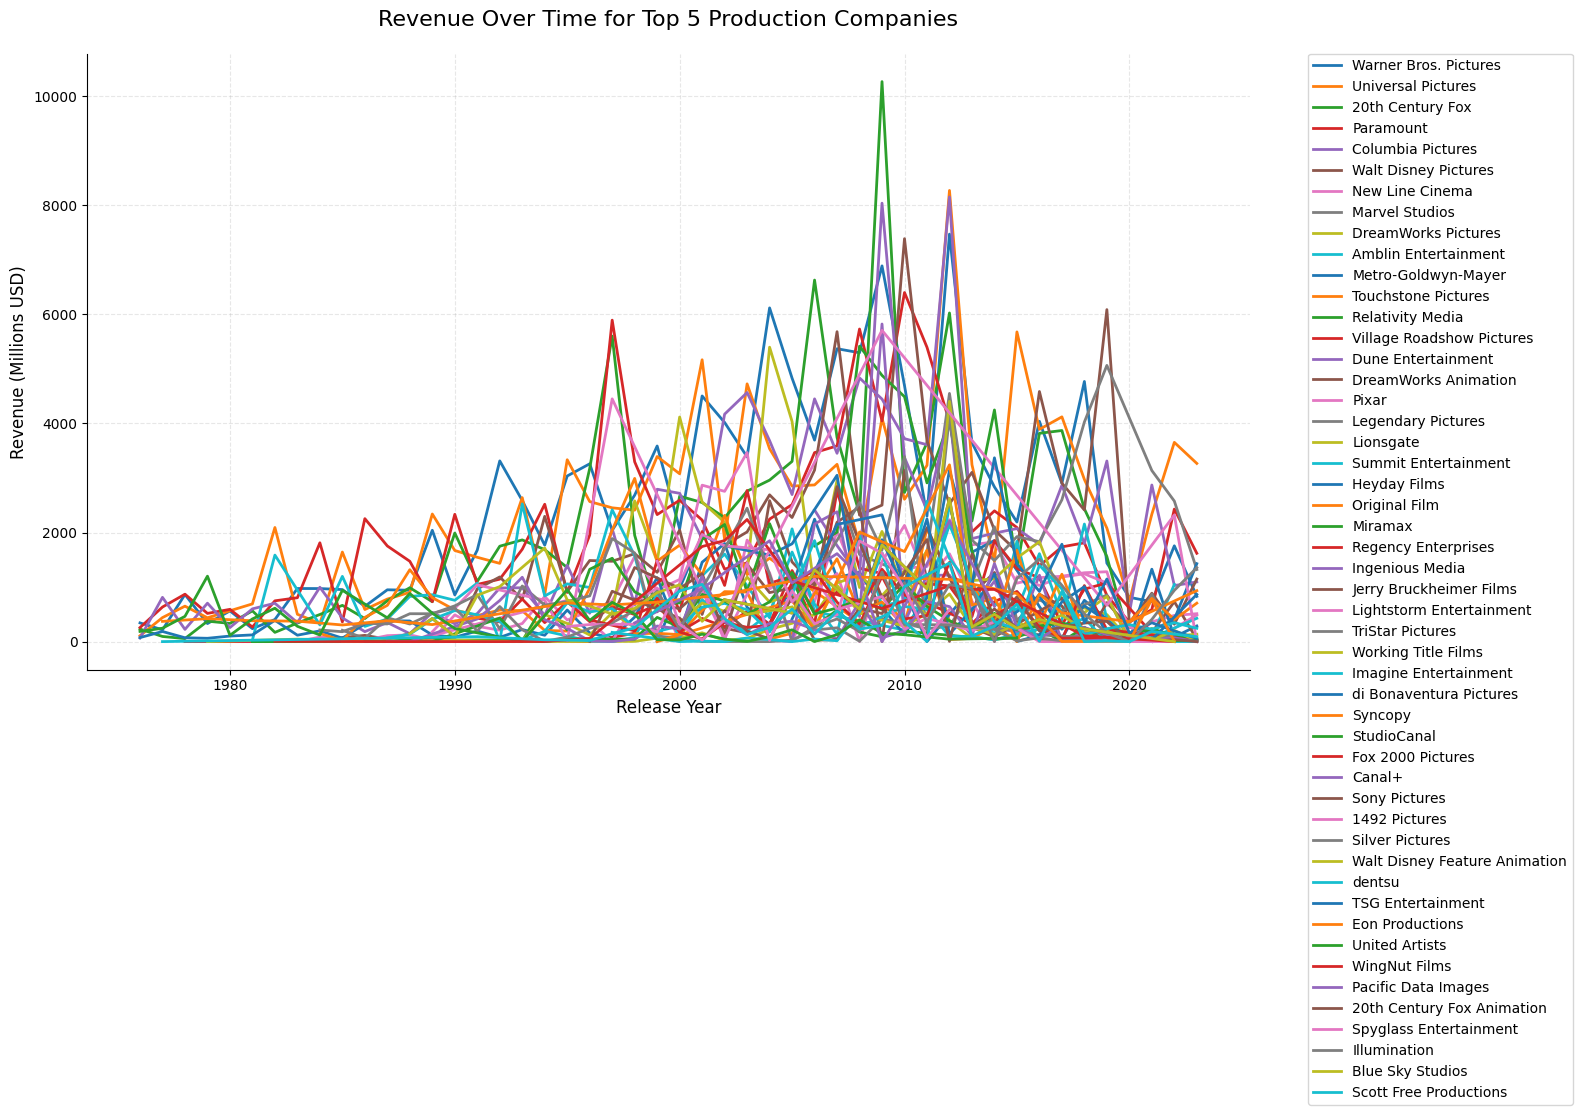

In [190]:
top_companies = (df_combined.explode('production_companies')
                .groupby('production_companies')['revenue']
                .sum()
                .nlargest(50)
                .index)

# Prepare data for plotting
company_revenue_time = (df_combined.explode('production_companies')
                       .groupby(['production_companies', 'release_year'])['revenue']
                       .sum()
                       .reset_index())

# Create the plot
plt.figure(figsize=(15, 8))

# Plot a line for each top company
for company in top_companies:
    data = company_revenue_time[company_revenue_time['production_companies'] == company]
    plt.plot(data['release_year'], 
            data['revenue'] / 1_000_000,  # Convert to millions
            linewidth=2,
            label=company)

plt.title('Revenue Over Time for Top 5 Production Companies', 
          fontsize=16, 
          pad=20)

# plt.yscale('log')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Revenue (Millions USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0.)

sns.despine()
plt.show()

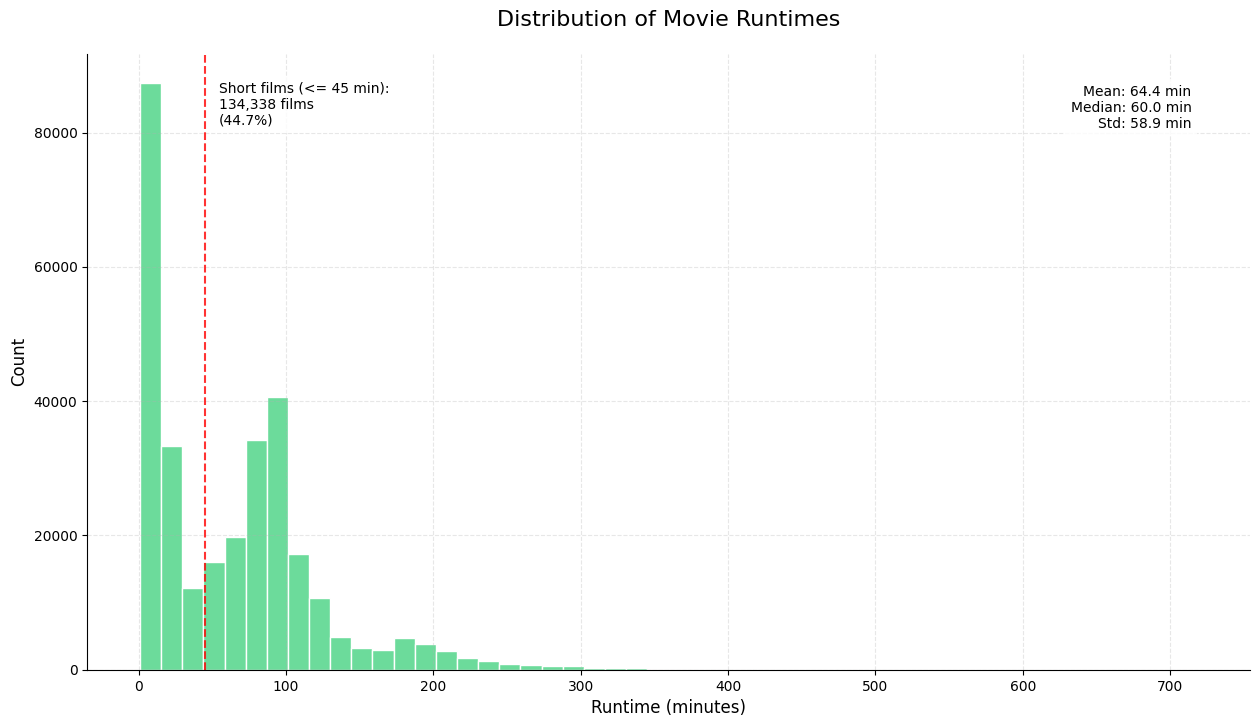

In [189]:
# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create histogram with better styling
sns.histplot(
    data=df_combined[df_combined['runtime'] > 0],  # Filter out 0 values
    x='runtime',
    bins=50,
    color='#2ecc71',
    alpha=0.7,
    edgecolor='white'
)

# Add vertical line at 45 minutes
plt.axvline(x=45, color='red', linestyle='--', alpha=0.8)

# Calculate statistics
runtime_stats = df_combined[df_combined['runtime'] > 0]['runtime'].describe()
short_films_count = len(df_combined[(df_combined['runtime'] > 0) & (df_combined['runtime'] <= 45)])
total_films = len(df_combined[df_combined['runtime'] > 0])
short_films_percent = (short_films_count / total_films) * 100

# Add statistical annotations
stats_text = (f"Mean: {runtime_stats['mean']:.1f} min\n"
             f"Median: {runtime_stats['50%']:.1f} min\n"
             f"Std: {runtime_stats['std']:.1f} min")

# Add short films annotation
short_films_text = f"Short films (<= 45 min):\n{short_films_count:,} films\n({short_films_percent:.1f}%)"

plt.annotate(stats_text,
            xy=(0.95, 0.95),
            xycoords='axes fraction',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8),
            ha='right',
            va='top')

plt.annotate(short_films_text,
            xy=(45, plt.gca().get_ylim()[1]),
            xytext=(10, -20),
            textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8),
            ha='left',
            va='top')

# Customize the plot
plt.title('Distribution of Movie Runtimes', 
          fontsize=16, 
          pad=20)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top and right spines
sns.despine()

plt.show()